In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [2]:
data_url = "data/gassuperpormes.csv"
data = pd.read_csv(data_url)

In [3]:
# Display basic information about the dataset
print("Dataset Summary:")
print(data.info())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MES/AÑO      13 non-null     object 
 1   Unnamed: 1   0 non-null      float64
 2   2001         13 non-null     float64
 3   2002         13 non-null     float64
 4   2003         13 non-null     float64
 5   2004         13 non-null     float64
 6   Unnamed: 6   0 non-null      float64
 7   2005         13 non-null     float64
 8   2006         13 non-null     float64
 9   2007         13 non-null     float64
 10  2008         13 non-null     float64
 11  2009         13 non-null     float64
 12  2010         13 non-null     float64
 13  2011         13 non-null     float64
 14  2012         13 non-null     float64
 15  2013         13 non-null     float64
 16  2014         13 non-null     float64
 17  2015         13 non-null     float64
 18  2016         13 non-null     float6

In [4]:
# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   MES/AÑO  Unnamed: 1   2001   2002   2003   2004  Unnamed: 6   2005   2006  \
0    ENERO         NaN  14.41  12.94  15.80  16.24         NaN  19.09  22.65   
1  FEBRERO         NaN  14.66  12.76  16.64  17.49         NaN  18.60  22.35   
2    MARZO         NaN  14.49  13.04  17.79  18.11         NaN  19.76  22.16   
3    ABRIL         NaN  14.46  14.60  17.01  18.48         NaN  21.94  24.48   
4     MAYO         NaN  15.76  14.65  15.92  18.89         NaN  22.48  26.85   

    2007  ...   2016   2017   2018   2019   2020   2021   2022   2023  \
0  22.99  ...  20.39  24.69  25.83  23.03  25.60  23.82  31.41  35.12   
1  22.04  ...  19.38  23.88  25.78  23.87  24.51  25.53  33.84  35.03   
2  23.13  ...  21.02  23.42  25.80  25.80  23.60  27.70  39.12  34.40   
3  25.53  ...  22.25  24.20  27.10  27.82  18.97  28.03  38.83  36.33   
4  27.59  ...  23.10  23.64  28.29  27.88  18.74  28.80  42.14  34.90   

   Unnamed: 26  Unnamed: 27  
0          NaN      

In [5]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Unnamed: 1       2001       2002       2003       2004  Unnamed: 6  \
count         0.0  13.000000  13.000000  13.000000  13.000000         0.0   
mean          NaN  14.596923  14.722308  16.203846  18.781538         NaN   
std           NaN   0.673293   1.178439   0.773149   1.060683         NaN   
min           NaN  13.210000  12.760000  15.070000  16.240000         NaN   
25%           NaN  14.410000  14.490000  15.800000  18.480000         NaN   
50%           NaN  14.490000  14.720000  16.200000  18.910000         NaN   
75%           NaN  14.660000  15.680000  16.640000  19.240000         NaN   
max           NaN  15.760000  16.120000  17.790000  20.310000         NaN   

            2005       2006       2007       2008  ...       2016       2017  \
count  13.000000  13.000000  13.000000  13.000000  ...  13.000000  13.000000   
mean   22.578462  24.859231  26.505385  31.260000  ...  22.276154  24.190000   
std     2.539150   2.071253   2.358494   4.03

In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
MES/AÑO         0
Unnamed: 1     13
2001            0
2002            0
2003            0
2004            0
Unnamed: 6     13
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            7
Unnamed: 26    13
Unnamed: 27    13
dtype: int64

Missing Values:
MES/AÑO         0
Unnamed: 1     13
2001            0
2002            0
2003            0
2004            0
Unnamed: 6     13
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0

In [7]:
data_cleaned = data
data_cleaned['2001'].fillna(method='ffill', inplace=True)
data_cleaned['2023'].fillna(method='ffill', inplace=True)

In [8]:
# Check for missing values
print("\nMissing Values:")
print(data_cleaned.isnull().sum())


Missing Values:
MES/AÑO         0
Unnamed: 1     13
2001            0
2002            0
2003            0
2004            0
Unnamed: 6     13
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
Unnamed: 26    13
Unnamed: 27    13
dtype: int64


In [9]:
fechas = []
precios = []

for i in range(1, 24):
    for j in range(0, 12):
        fechas.append(str(data_cleaned.columns[i]) + "-" + str(j+1).zfill(2))
        precios.append(data_cleaned.iloc[j, i])

data_transformation = pd.DataFrame({'Fecha': fechas, 'Precio': precios})

print(data_transformation)

             Fecha  Precio
0    Unnamed: 1-01     NaN
1    Unnamed: 1-02     NaN
2    Unnamed: 1-03     NaN
3    Unnamed: 1-04     NaN
4    Unnamed: 1-05     NaN
..             ...     ...
271        2021-08   29.91
272        2021-09   30.23
273        2021-10   31.00
274        2021-11   31.55
275        2021-12   29.82

[276 rows x 2 columns]


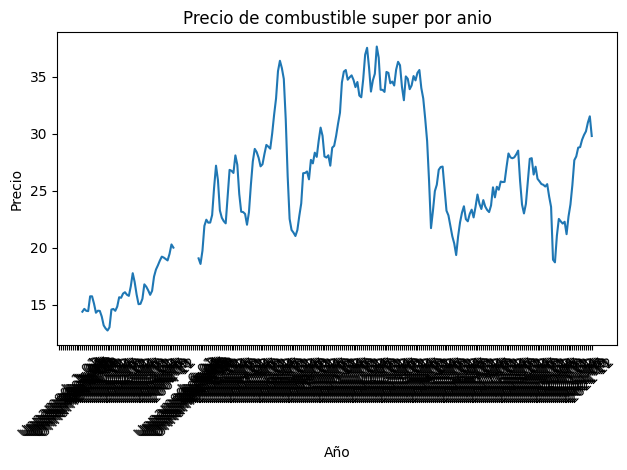

In [10]:
# plt.plot(data_transformation)
# plt.gca().set(title="Precio de combustible super por mes", xlabel="Año", ylabel="Precio")
# plt.show()
plt.plot(data_transformation['Fecha'], data_transformation['Precio'])
plt.gca().set(title="Precio de combustible super por anio", xlabel="Año", ylabel="Precio")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout for better spacing
plt.show()

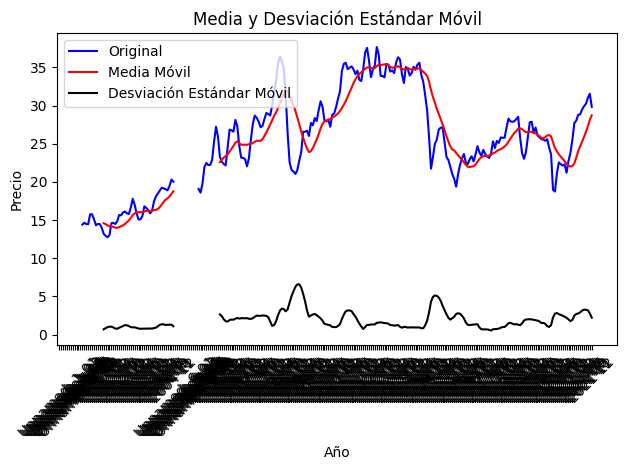

In [11]:
mediaMovil = data_transformation['Precio'].rolling(window=12).mean()
deMovil = data_transformation['Precio'].rolling(window=12).std()

# Plotting the results
plt.plot(data_transformation['Fecha'], data_transformation['Precio'], color="blue", label="Original")
plt.plot(data_transformation['Fecha'], mediaMovil, color='red', label='Media Móvil')
plt.plot(data_transformation['Fecha'], deMovil, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title('Media y Desviación Estándar Móvil')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

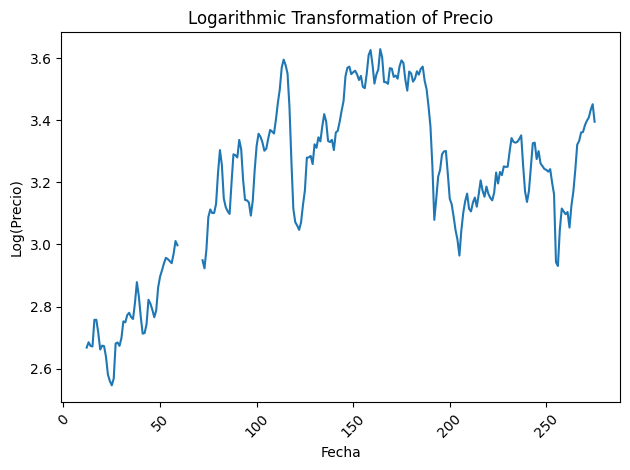

In [12]:
data_transformation['Precio_Log'] = np.log(data_transformation['Precio'])
data_transformation_log = np.log(data_transformation['Precio'])
plt.plot(data_transformation.index, data_transformation['Precio_Log'])
plt.gca().set(title="Logarithmic Transformation of Precio", xlabel="Fecha", ylabel="Log(Precio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
data_cleaned = data_transformation.dropna(subset=['Precio'])
mean_precio = data_transformation['Precio'].mean()
data_transformation['Precio'].fillna(mean_precio, inplace=True)


In [14]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(data_transformation['Precio'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)' % key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -2.482075
p-value                        0.119897
# de retardos usados           2.000000
# de observaciones usadas    273.000000
Critical Value (1%)           -3.454533
Critical Value (5%)           -2.872186
Critical Value (10%)          -2.572443
dtype: float64


In [15]:
non_numeric_rows = data_transformation[~data_transformation['Precio'].apply(pd.to_numeric, errors='coerce').notnull()]
print(non_numeric_rows)


Empty DataFrame
Columns: [Fecha, Precio, Precio_Log]
Index: []


In [16]:
data_transformation['Fecha'] = pd.to_datetime(data_transformation['Fecha'], errors='coerce')
data_transformation['Fecha'] = data_transformation['Fecha'].sub(pd.Timestamp('1970-01-01')).dt.days


C:\Users\rebec\AppData\Local\Temp\ipykernel_9968\3797463665.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_transformation['Fecha'] = pd.to_datetime(data_transformation['Fecha'], errors='coerce')


In [17]:
data_transformation_diff = data_transformation['Precio'].diff()
data_transformation_diff.dropna(inplace=True)
dfTest = adfuller(data_transformation_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key, value in dfTest[4].items():
    salidaDf['Critical Value (%s)' % key] = value
print(salidaDf)

Estadístico de prueba       -1.052881e+01
p-value                      9.266482e-19
# de retardos usados         1.000000e+00
# de observaciones usadas    2.730000e+02
Critical Value (1%)         -3.454533e+00
Critical Value (5%)         -2.872186e+00
Critical Value (10%)        -2.572443e+00
dtype: float64


In [18]:
data_transformation_diff = data_transformation_diff.diff()
data_transformation_diff.dropna(inplace=True)
dfTest = adfuller(data_transformation_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Estadístico de prueba       -8.695668e+00
p-value                      3.931287e-14
# de retardos usados         1.100000e+01
# de observaciones usadas    2.620000e+02
Critical Value (1%)         -3.455558e+00
Critical Value (5%)         -2.872636e+00
Critical Value (10%)        -2.572683e+00
dtype: float64


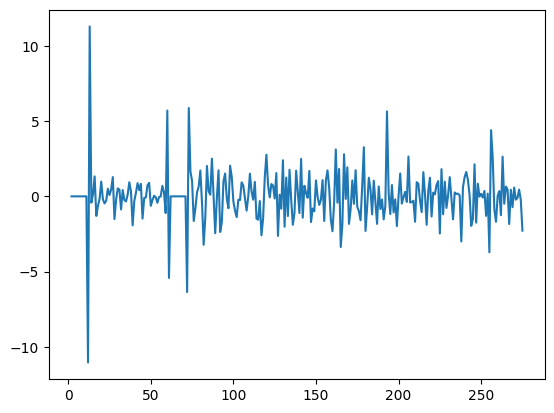

In [19]:
plt.plot(data_transformation_diff)

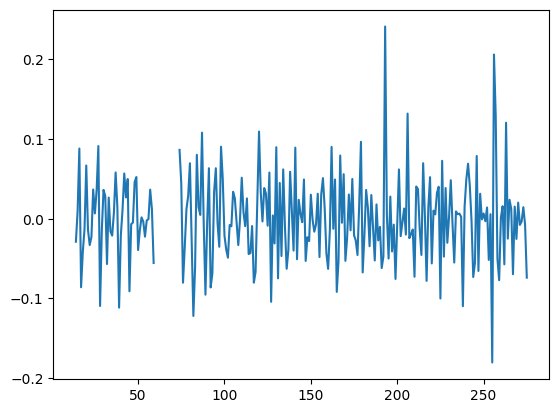

In [20]:
plt.plot(data_transformation_log.diff().diff())

In [21]:
data_transformation_log_diff = data_transformation_log.diff().diff()
data_transformation_log_diff.dropna(inplace = True)
tsa_acf = acf(data_transformation_log_diff,nlags=5,fft=False)
tsa_pacf = pacf(data_transformation_log_diff, nlags=36)
tsa_acf

array([ 1.00000000e+00, -1.51348672e-01, -2.53962123e-01, -9.90574761e-02,
        5.33512710e-05,  1.30229333e-02])

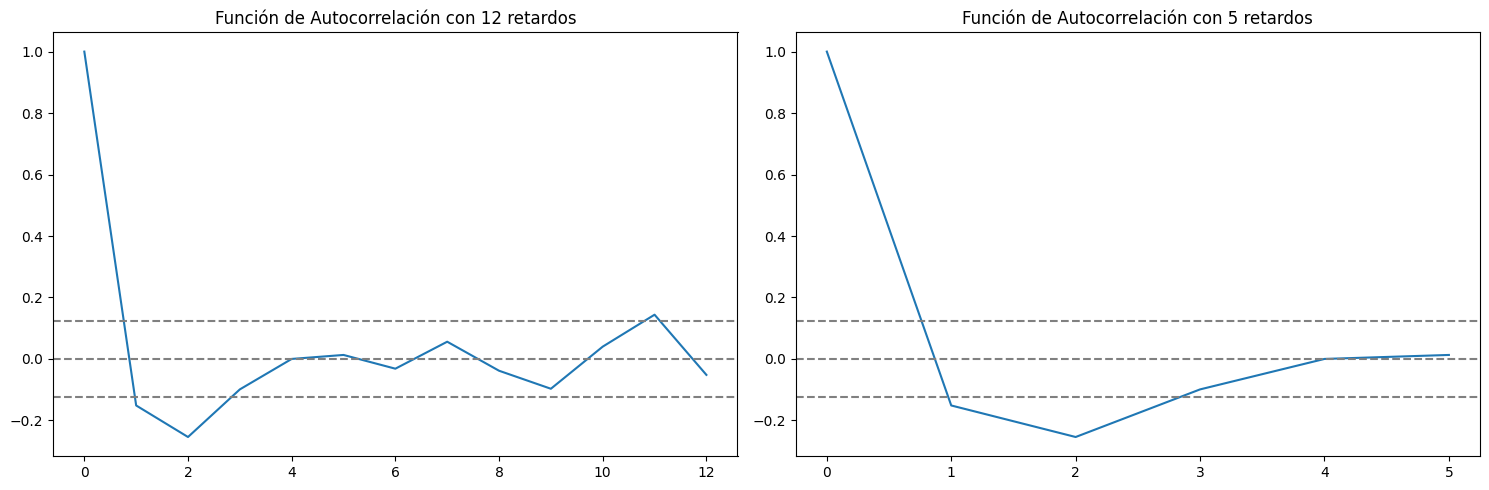

In [22]:

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(data_transformation_log_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(data_transformation_log_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

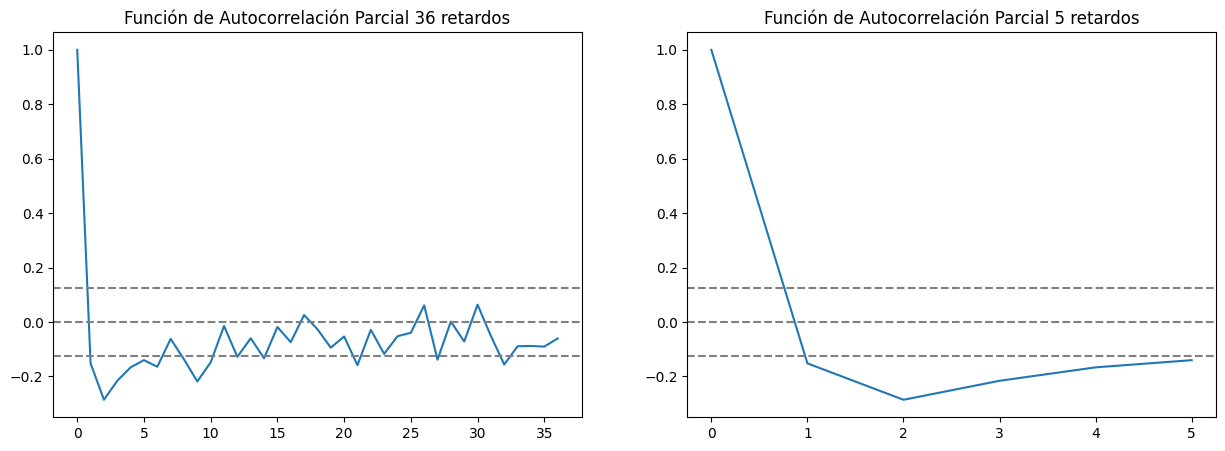

In [23]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(data_transformation_log_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(data_transformation_log_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

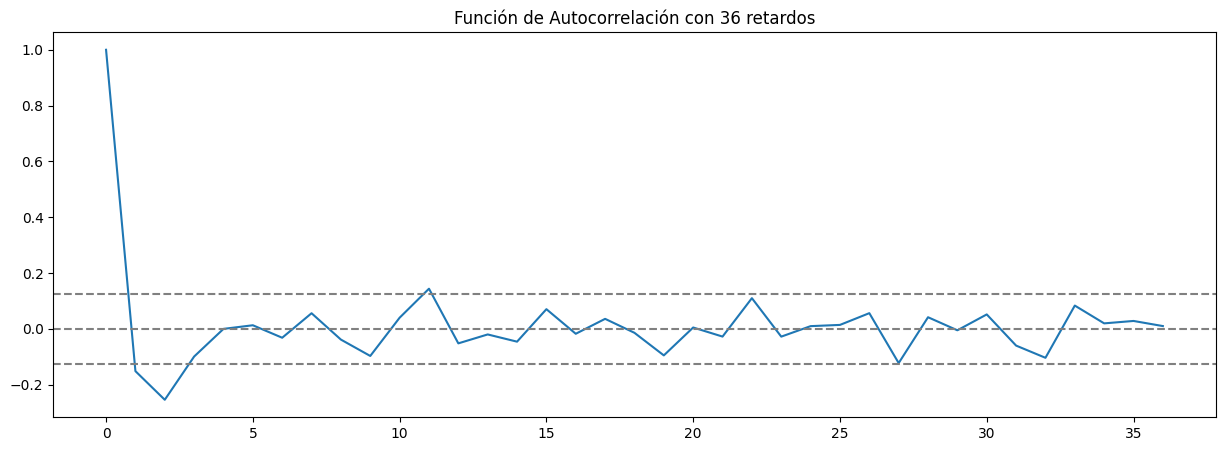

In [24]:
plt.plot(acf(data_transformation_log_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

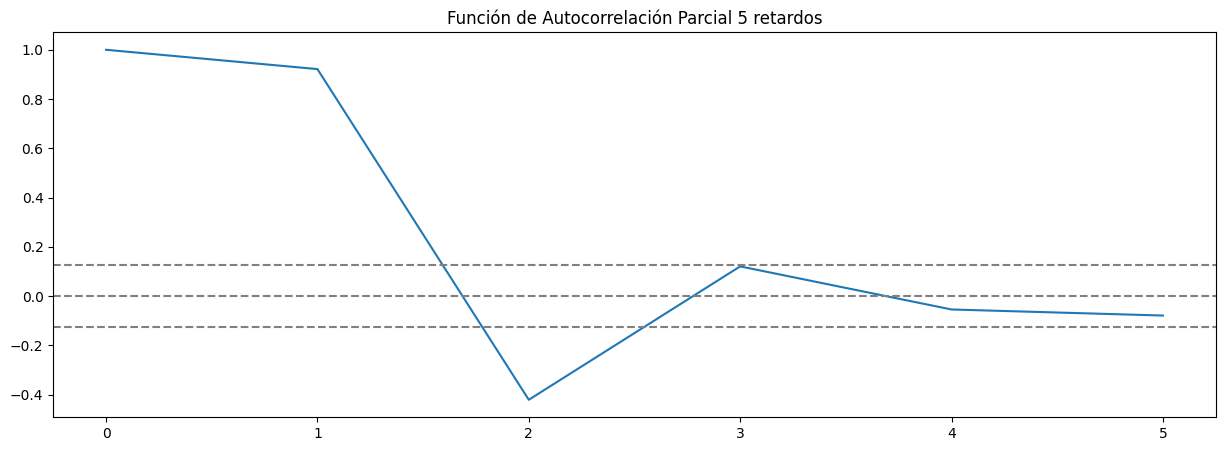

In [25]:
data_transformation_log_D = data_transformation_log.diff(12)
data_transformation_log_D.dropna(inplace=True)
plt.plot(pacf(data_transformation_log_D, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_transformation_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')